# Face Recognition with Haar Cascades + FaceNet (CPU-Friendly Version)

This Colab notebook uses Haar Cascades for face detection and FaceNet for face embeddings. No GPU required.


In [ ]:
# Install necessary packages
!pip install mtcnn keras-facenet opencv-python-headless


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.0 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=3649e99e0b5c81167c216e76e1a1be5423205de290a3a9e761424d3cd37d588b
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [ ]:
from google.colab import files
uploaded = files.upload()
# Upload two images: known_face.jpg and test_face.jpg


Saving test_face.jpg to test_face.jpg


In [ ]:
import cv2
import numpy as np
from keras_facenet import FaceNet
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [ ]:
# Load Haar Cascade model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
def detect_and_crop_face(image_path):
    img = cv2.imread(image_path)
    # Add a check to see if the image was read successfully
    if img is None:
        raise FileNotFoundError(f"Error: Image not found or could not be read at path: {image_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) == 0:
        raise ValueError("No face detected in image.")

    x, y, w, h = faces[0]
    face_img = img[y:y+h, x:x+w]
    face_img = cv2.resize(face_img, (160, 160))
    return face_img


In [ ]:
# Replace these with your image file names
known_img = detect_and_crop_face("known_face.jpg")
test_img = detect_and_crop_face("test_face.jpg")


In [ ]:
embedder = FaceNet()
known_embed = embedder.embeddings([known_img])[0]
test_embed = embedder.embeddings([test_img])[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [ ]:
sim_score = cosine_similarity([known_embed], [test_embed])[0][0]
print(f"Cosine Similarity Score: {sim_score:.4f}")

if sim_score > 0.6:
    print("✅ Faces Match!")
else:
    print("❌ Faces Do Not Match")


Cosine Similarity Score: 0.6377
✅ Faces Match!


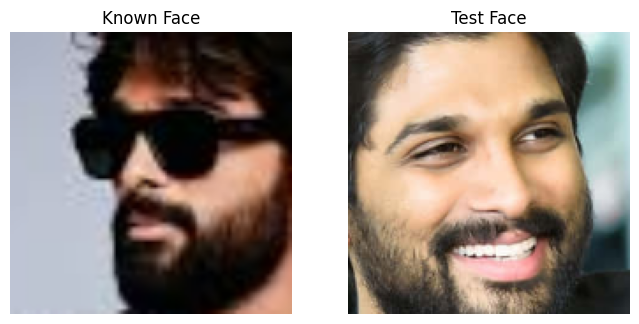

In [ ]:
def show_images(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Known Face")
    axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Test Face")
    for ax in axs:
        ax.axis('off')
    plt.show()

show_images(known_img, test_img)
